#DESAFIO:2 TELECOM X

#📌 Extracción

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

Qué debes hacer?

✅ Cargar los datos directamente desde la API utilizando Python.

✅ Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

### Extracción de Datos

In [162]:
import requests
import pandas as pd
# URL del archivo JSON
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"


In [163]:
# Cargar los datos
response = requests.get(url)
data = response.json()
datos = pd.DataFrame(data)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### Normalización de Datos

In [164]:
datos = pd.json_normalize(data)
datos

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

###Conoce el conjunto de datos


¿Qué debes hacer?

✅ Explorar las columnas del dataset y verificar sus tipos de datos.

✅ Consultar el diccionario para comprender mejor el significado de las variables.

✅ Identificar las columnas más relevantes para el análisis de evasión.

In [165]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [166]:
datos.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [167]:
print("Numero de Nulos \n", datos.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


Durante la exploración se identificaron:

*    Variables categóricas (tipo object)

*    Variables numéricas (int, float)

*    Variable objetivo: Churn

In [168]:
#Valores vacios
datos.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [169]:
#Transformaión de columna
datos['account.Charges.Total'] = pd.to_numeric(datos['account.Charges.Total'], errors='coerce')

In [170]:
datos= datos[datos['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(datos))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [171]:
#Diccionario de ingles a español para comprender mejor
diccionario_datos = {
    'customerID':                   'ID_Cliente',
    'Churn':                        'Evasion',
    'customer.gender':              'Genero',
    'customer.SeniorCitizen':       'Adulto_Mayor',
    'customer.Partner':             'Tiene_Pareja',
    'customer.Dependents':          'Tiene_Dependientes',
    'customer.tenure':              'Meses_Contrato',
    'phone.PhoneService':           'Servicio_Telefono',
    'phone.MultipleLines':          'Multiples_Lineas',
    'internet.InternetService':     'Tipo_Internet',
    'internet.OnlineSecurity':      'Seguridad_Online',
    'internet.OnlineBackup':        'Backup_Online',
    'internet.DeviceProtection':    'Proteccion_Dispositivo',
    'internet.TechSupport':         'Soporte_Tecnico',
    'internet.StreamingTV':         'Streaming_TV',
    'internet.StreamingMovies':     'Streaming_Peliculas',
    'account.Contract':             'Tipo_Contrato',
    'account.PaperlessBilling':     'Factura_Digital',
    'account.PaymentMethod':        'Metodo_Pago',
    'account.Charges.Monthly':      'Cargos_Mensuales',
    'account.Charges.Total':        'Cargos_Totales'
}

In [172]:
#Apilación del cambio
datos = datos.rename(columns=diccionario_datos)

In [173]:
#Verificar que el cambio fue exitoso
datos.head()

,ID_Cliente,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefono,Multiples_Lineas,Tipo_Internet,...,Backup_Online,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


A partir del análisis, comparación de medias y distribución porcentual por tipo de contrato, se identificó que las variables más influyentes en la evasión de clientes son la antigüedad del contrato, los cargos mensuales y el tipo de contrato.

###Comprobación de incoherencias en los datos

In [174]:
datos['Evasion'] = datos['Evasion'].replace({'No': 'No', 'Yes': 'Sí'})
datos['Genero'] = datos['Genero'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
datos['Tiene_Pareja'] = datos['Tiene_Pareja'].replace({'Yes': 'Sí', 'No': 'No'})
datos['Tiene_Dependientes'] = datos['Tiene_Dependientes'].replace({'Yes': 'Sí', 'No': 'No'})
datos['Servicio_Telefono'] = datos['Servicio_Telefono'].replace({'Yes': 'Sí', 'No': 'No'})
datos['Multiples_Lineas'] = datos['Multiples_Lineas'].replace({'No': 'No', 'Yes': 'Sí', 'No phone service': 'Sin servicio de teléfono'})
datos['Iipo_Internet'] = datos['Tipo_Internet'].replace({'No': 'No'})
datos['Tipo_Contrato'] = datos['Tipo_Contrato'].replace({'One year': 'Anual', 'Month-to-month': 'Mensual', 'Two year': 'Bienal'})
datos.head()

,ID_Cliente,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefono,Multiples_Lineas,Tipo_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Iipo_Internet
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Yes,Yes,No,Anual,Yes,Mailed check,65.6,593.30,DSL
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Yes,Mensual,No,Mailed check,59.9,542.40,DSL
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Yes,No,No,No,Mensual,Yes,Electronic check,73.9,280.85,Fiber optic
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Yes,No,Yes,Yes,Mensual,Yes,Electronic check,98.0,1237.85,Fiber optic
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Yes,Yes,No,Mensual,Yes,Mailed check,83.9,267.40,Fiber optic


In [175]:
columnas_a_traducir = ['Seguridad_Online', 'Backup_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico', 'Streaming_TV', 'Streaming_Peliculas']
mapeo = {'No': 'No', 'Yes': 'Sí', 'No internet service': 'Sin servicio de internet'}

for col in columnas_a_traducir:
    datos[col] = datos[col].replace(mapeo)

datos.head()

,ID_Cliente,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefono,Multiples_Lineas,Tipo_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Iipo_Internet
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Yes,Mailed check,65.6,593.30,DSL
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Mailed check,59.9,542.40,DSL
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Mensual,Yes,Electronic check,73.9,280.85,Fiber optic
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Mensual,Yes,Electronic check,98.0,1237.85,Fiber optic
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Mensual,Yes,Mailed check,83.9,267.40,Fiber optic


In [176]:
print("Numero de Nulos \n", datos.isnull().sum())

Numero de Nulos 
 ID_Cliente                 0
Evasion                    0
Genero                     0
Adulto_Mayor               0
Tiene_Pareja               0
Tiene_Dependientes         0
Meses_Contrato             0
Servicio_Telefono          0
Multiples_Lineas           0
Tipo_Internet              0
Seguridad_Online           0
Backup_Online              0
Proteccion_Dispositivo     0
Soporte_Tecnico            0
Streaming_TV               0
Streaming_Peliculas        0
Tipo_Contrato              0
Factura_Digital            0
Metodo_Pago                0
Cargos_Mensuales           0
Cargos_Totales            11
Iipo_Internet              0
dtype: int64


In [177]:
datos

,ID_Cliente,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefono,Multiples_Lineas,Tipo_Internet,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Iipo_Internet
0,0002-ORFBO,No,Femenino,0,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Anual,Yes,Mailed check,65.60,593.30,DSL
1,0003-MKNFE,No,Masculino,0,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Mailed check,59.90,542.40,DSL
2,0004-TLHLJ,Sí,Masculino,0,No,No,4,Sí,No,Fiber optic,...,Sí,No,No,No,Mensual,Yes,Electronic check,73.90,280.85,Fiber optic
3,0011-IGKFF,Sí,Masculino,1,Sí,No,13,Sí,No,Fiber optic,...,Sí,No,Sí,Sí,Mensual,Yes,Electronic check,98.00,1237.85,Fiber optic
4,0013-EXCHZ,Sí,Femenino,1,Sí,No,3,Sí,No,Fiber optic,...,No,Sí,Sí,No,Mensual,Yes,Mailed check,83.90,267.40,Fiber optic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Femenino,0,No,No,13,Sí,No,DSL,...,No,Sí,No,No,Anual,No,Mailed check,55.15,742.90,DSL
7263,9992-RRAMN,Sí,Masculino,0,Sí,No,22,Sí,Sí,Fiber optic,...,No,No,No,Sí,Mensual,Yes,Electronic check,85.10,1873.70,Fiber optic
7264,9992-UJOEL,No,Masculino,0,No,No,2,Sí,No,DSL,...,No,No,No,No,Mensual,Yes,Mailed check,50.30,92.75,DSL
7265,9993-LHIEB,No,Masculino,0,Sí,Sí,67,Sí,No,DSL,...,Sí,Sí,No,Sí,Bienal,No,Mailed check,67.85,4627.65,DSL


###Columna de cuentas diarias (Opcional)

Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

In [178]:
#crear cuentas_diarias
datos["Cuentas_Diarias"] = (datos["Cargos_Mensuales"] / 30).round(2)

In [179]:
datos[["Cargos_Mensuales", "Cuentas_Diarias"]].head(5)

,Cargos_Mensuales,Cuentas_Diarias
0,65.6,2.19
1,59.9,2.00
2,73.9,2.46
3,98.0,3.27
4,83.9,2.80


In [180]:
datos['Cuentas_Diarias'].describe()

,Cuentas_Diarias
count,7043.000000
mean,2.158675
std,1.003088
min,0.610000
25%,1.180000
50%,2.340000
75%,2.990000
max,3.960000


###Estandarización y transformación de datos (opcional)

In [181]:
#Traducir categorías
datos["Genero"] = datos["Genero"].replace({
    "Male": "Masculino",
    "Female": "Femenino"
})

In [182]:
#Traducir tipo de contrato
datos["Tipo_Contrato"] = datos["Tipo_Contrato"].replace({
    "Month-to-month": "Mensual",
    "One year": "Un Año",
    "Two year": "Dos Años"
})

In [183]:
#Traducir tipo de internet
datos["Tipo_Internet"] = datos["Tipo_Internet"].replace({
    "Fiber optic": "Fibra Optica",
    "DSL": "DSL",
    "No": "Sin Servicio"
})

In [184]:
datos["Metodo_Pago"] = datos["Metodo_Pago"].replace({
    "Mailed check": "Cheque Enviado",
    "Electronic check": "Cheque Electronico",
    "Credit card (automatic)": "Tarjeta de crédito (automático)",
    "Bank transfer (automatic)": "Transferencia bancaria (automática)"
})

In [185]:
for col in datos.select_dtypes(include="object").columns:
    datos[col] = datos[col].str.title()

In [186]:
datos

,ID_Cliente,Evasion,Genero,Adulto_Mayor,Tiene_Pareja,Tiene_Dependientes,Meses_Contrato,Servicio_Telefono,Multiples_Lineas,Tipo_Internet,...,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Factura_Digital,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Iipo_Internet,Cuentas_Diarias
0,0002-Orfbo,No,Femenino,0,Sí,Sí,9,Sí,No,Dsl,...,Sí,Sí,No,Anual,Yes,Cheque Enviado,65.60,593.30,Dsl,2.19
1,0003-Mknfe,No,Masculino,0,No,No,9,Sí,Sí,Dsl,...,No,No,Sí,Mensual,No,Cheque Enviado,59.90,542.40,Dsl,2.00
2,0004-Tlhlj,Sí,Masculino,0,No,No,4,Sí,No,Fibra Optica,...,No,No,No,Mensual,Yes,Cheque Electronico,73.90,280.85,Fiber Optic,2.46
3,0011-Igkff,Sí,Masculino,1,Sí,No,13,Sí,No,Fibra Optica,...,No,Sí,Sí,Mensual,Yes,Cheque Electronico,98.00,1237.85,Fiber Optic,3.27
4,0013-Exchz,Sí,Femenino,1,Sí,No,3,Sí,No,Fibra Optica,...,Sí,Sí,No,Mensual,Yes,Cheque Enviado,83.90,267.40,Fiber Optic,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-Lutyd,No,Femenino,0,No,No,13,Sí,No,Dsl,...,Sí,No,No,Anual,No,Cheque Enviado,55.15,742.90,Dsl,1.84
7263,9992-Rramn,Sí,Masculino,0,Sí,No,22,Sí,Sí,Fibra Optica,...,No,No,Sí,Mensual,Yes,Cheque Electronico,85.10,1873.70,Fiber Optic,2.84
7264,9992-Ujoel,No,Masculino,0,No,No,2,Sí,No,Dsl,...,No,No,No,Mensual,Yes,Cheque Enviado,50.30,92.75,Dsl,1.68
7265,9993-Lhieb,No,Masculino,0,Sí,Sí,67,Sí,No,Dsl,...,Sí,No,Sí,Bienal,No,Cheque Enviado,67.85,4627.65,Dsl,2.26


#📊Carga y análisis(L - Load & Analysis)

Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.



###Análisis Descriptivo

In [187]:
datos.describe()

,Adulto_Mayor,Meses_Contrato,Cargos_Mensuales,Cargos_Totales,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158675
std,0.368612,24.559481,30.090047,2266.771362,1.003088
min,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,9.000000,35.500000,401.450000,1.180000
50%,0.000000,29.000000,70.350000,1397.475000,2.340000
75%,0.000000,55.000000,89.850000,3794.737500,2.990000
max,1.000000,72.000000,118.750000,8684.800000,3.960000


In [188]:
import numpy as np
numericas = datos.select_dtypes(include=np.number)

media = numericas.mean()
mediana = numericas.median()
desviacion = numericas.std()
print(" La media:\n", media)
print("\n La mediana:\n", mediana)
print("\n Desviación estándar:\n", desviacion)



 La media:
 Adulto_Mayor           0.162147
Meses_Contrato        32.371149
Cargos_Mensuales      64.761692
Cargos_Totales      2283.300441
Cuentas_Diarias        2.158675
dtype: float64

 La mediana:
 Adulto_Mayor           0.000
Meses_Contrato        29.000
Cargos_Mensuales      70.350
Cargos_Totales      1397.475
Cuentas_Diarias        2.340
dtype: float64

 Desviación estándar:
 Adulto_Mayor           0.368612
Meses_Contrato        24.559481
Cargos_Mensuales      30.090047
Cargos_Totales      2266.771362
Cuentas_Diarias        1.003088
dtype: float64


###Distribución de evasión

En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes.

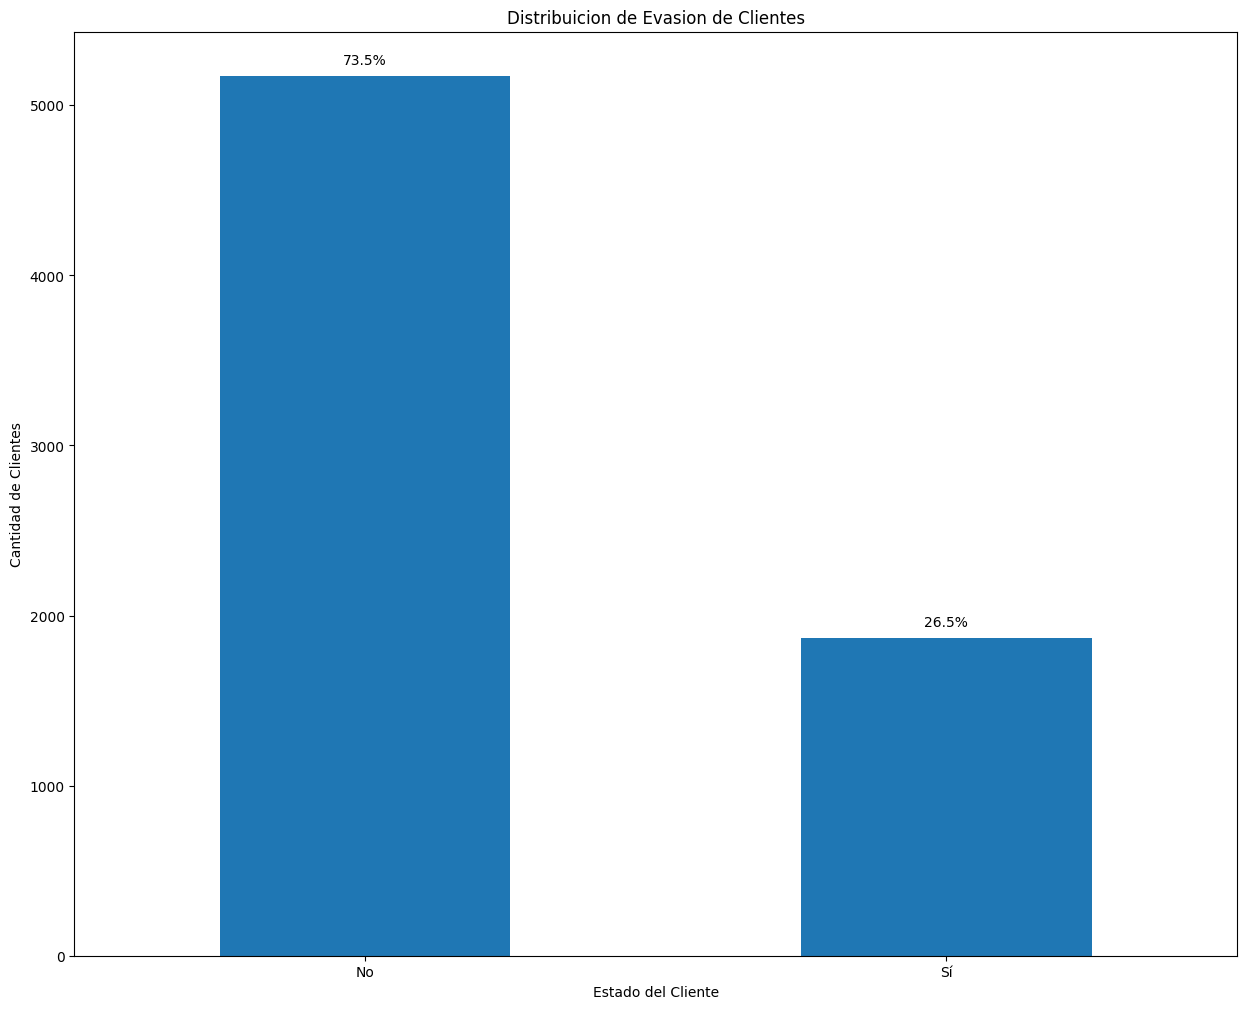

In [189]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
evasion_counts = datos['Evasion'].value_counts()
churn_percentages = (evasion_counts / len(datos)) * 100

ax = evasion_counts.plot(kind='bar')
plt.title('Distribuicion de Evasion de Clientes')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)

for i, percentage in enumerate(churn_percentages):
    ax.text(i, evasion_counts.iloc[i] + 50, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

###Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago.

Evasión por Género

In [190]:
import plotly.express as px
import pandas as pd

colores = {
    "No_Evasion": "#40E0D0",
    "Evasion": "#FF7F50"
}

In [191]:
tabla_genero = pd.crosstab(
    datos["Genero"],
    datos["Evasion"],
    normalize="index"
).reset_index()

tabla_genero.columns = ["Genero", "No_Evasion", "Evasion"]

tabla_genero_melt = tabla_genero.melt(
    id_vars="Genero",
    value_vars=["No_Evasion", "Evasion"],
    var_name="Estado",
    value_name="Proporcion"
)

fig = px.bar(
    tabla_genero_melt,
    x="Genero",
    y="Proporcion",
    color="Estado",
    barmode="group",
    color_discrete_map=colores,
    text=tabla_genero_melt["Proporcion"].apply(lambda x: f"{x:.1%}")
)

fig.update_layout(
    title="Distribución de Evasión según Género",
    yaxis_tickformat=".0%",
    plot_bgcolor="white",
    paper_bgcolor="white",
    xaxis_title="Género",
    yaxis_title="Porcentaje"
)

fig.show()

Evasión por Tipo de Contrato


In [192]:
tabla_contrato = pd.crosstab(
    datos["Tipo_Contrato"],
    datos["Evasion"],
    normalize="index"
).reset_index()

tabla_contrato.columns = ["Tipo_Contrato", "No_Evasion", "Evasion"]

tabla_contrato_melt = tabla_contrato.melt(
    id_vars="Tipo_Contrato",
    value_vars=["No_Evasion", "Evasion"],
    var_name="Estado",
    value_name="Proporcion"
)

fig = px.bar(
    tabla_contrato_melt,
    x="Tipo_Contrato",
    y="Proporcion",
    color="Estado",
    barmode="stack",
    color_discrete_map=colores,
    text=tabla_contrato_melt["Proporcion"].apply(lambda x: f"{x:.1%}")
)

fig.update_layout(
    title="Distribución de Evasión según Tipo de Contrato",
    yaxis_tickformat=".0%",
    plot_bgcolor="white",
    paper_bgcolor="white"
)

fig.show()

Evasión por Método de Pago

In [193]:
tabla_pago = pd.crosstab(
    datos["Metodo_Pago"],
    datos["Evasion"],
    normalize="index"
).reset_index()

tabla_pago.columns = ["Metodo_Pago", "No_Evasion", "Evasion"]

tabla_pago_melt = tabla_pago.melt(
    id_vars="Metodo_Pago",
    value_vars=["No_Evasion", "Evasion"],
    var_name="Estado",
    value_name="Proporcion"
)

fig = px.bar(
    tabla_pago_melt,
    x="Metodo_Pago",
    y="Proporcion",
    color="Estado",
    barmode="stack",
    color_discrete_map=colores,
    text=tabla_pago_melt["Proporcion"].apply(lambda x: f"{x:.1%}")
)

fig.update_layout(
    title="Distribución de Evasión según Método de Pago",
    yaxis_tickformat=".0%",
    xaxis_tickangle=45,
    plot_bgcolor="white",
    paper_bgcolor="white"
)

fig.show()

Evasión según Tipo de Internet


In [194]:
tabla_internet = pd.crosstab(
    datos["Tipo_Internet"],
    datos["Evasion"],
    normalize="index"
).reset_index()

tabla_internet.columns = ["Tipo_Internet", "No_Evasion", "Evasion"]

tabla_internet_melt = tabla_internet.melt(
    id_vars="Tipo_Internet",
    value_vars=["No_Evasion", "Evasion"],
    var_name="Estado",
    value_name="Proporcion"
)

fig = px.bar(
    tabla_internet_melt,
    x="Tipo_Internet",
    y="Proporcion",
    color="Estado",
    barmode="stack",
    color_discrete_map=colores,
    text=tabla_internet_melt["Proporcion"].apply(lambda x: f"{x:.1%}")
)

fig.update_layout(
    title="Distribución de Evasión según Tipo de Internet",
    yaxis_tickformat=".0%",
    plot_bgcolor="white",
    paper_bgcolor="white"
)

fig.show()

###Conteo de evasión por variables numéricas

En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

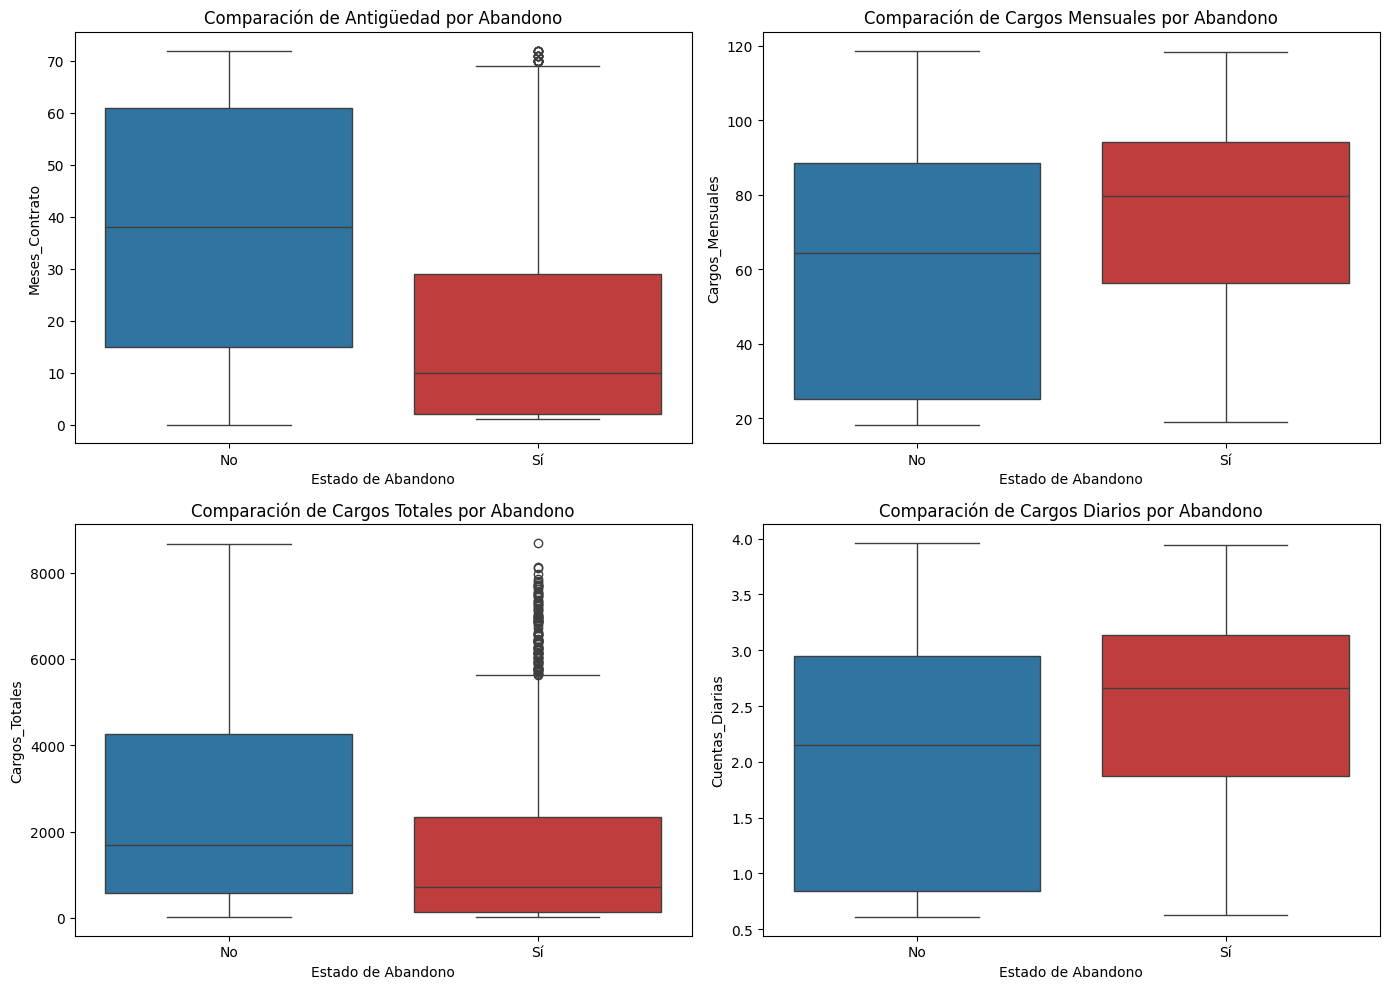

In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

colores = {
    "No": "#1f77b4",
    "Sí": "#d62728"
}

# 1. Antigüedad en meses
sns.boxplot(
    data=datos,
    x="Evasion",
    y="Meses_Contrato",
    hue="Evasion",
    palette=colores,
    legend=False,
    ax=axes[0, 0]
)

axes[0, 0].set_title("Comparación de Antigüedad por Abandono")
axes[0, 0].set_xlabel("Estado de Abandono")
axes[0, 0].set_ylabel("Meses_Contrato")

# 2. Cargos Mensuales
sns.boxplot(
    data=datos,
    x="Evasion",
    y="Cargos_Mensuales",
    hue="Evasion",
    palette=colores,
    legend=False,
    ax=axes[0, 1]
)

axes[0, 1].set_title("Comparación de Cargos Mensuales por Abandono")
axes[0, 1].set_xlabel("Estado de Abandono")
axes[0, 1].set_ylabel("Cargos_Mensuales")

# 3. Cargos Totales
sns.boxplot(
    data=datos,
    x="Evasion",
    y="Cargos_Totales",
    hue="Evasion",
    palette=colores,
    legend=False,
    ax=axes[1, 0]
)

axes[1, 0].set_title("Comparación de Cargos Totales por Abandono")
axes[1, 0].set_xlabel("Estado de Abandono")
axes[1, 0].set_ylabel("Cargos_Totales")

# 4. Cargos Diarios
sns.boxplot(
    data=datos,
    x="Evasion",
    y="Cuentas_Diarias",
    hue="Evasion",
    palette=colores,
    legend=False,
    ax=axes[1, 1]
)

axes[1, 1].set_title("Comparación de Cargos Diarios por Abandono")
axes[1, 1].set_xlabel("Estado de Abandono")
axes[1, 1].set_ylabel("Cuentas_Diarias")

plt.tight_layout()
plt.show()

#📊 Informe Final

###Introducción

El presente análisis tiene como objetivo estudiar el fenómeno de evasión de clientes (Churn) dentro de una empresa de telecomunicaciones.

La evasión representa la cancelación del servicio por parte de los clientes, lo cual impacta directamente en los ingresos, estabilidad financiera y crecimiento de la organización.

Mediante técnicas de limpieza, transformación y análisis exploratorio de datos, se busca identificar patrones y factores asociados al abandono del servicio, con el fin de generar información estratégica que apoye la toma de decisiones y el diseño de estrategias de retención.

###Limpieza y Tratamiento de Datos

Durante esta etapa se realizaron los siguientes procesos:

📌 Importación y normalización

*   Conversión de los datos a un DataFrame de Pandas.

*   Normalización de estructuras JSON utilizando json_normalize.

📌 Estandarización

*   Traducción de columnas al español para mayor claridad.

*   Traducción de variables categóricas como:

Género

Tipo de contrato

Método de pago

Tipo de internet

📌 Manejo de inconsistencias

*   Eliminación de espacios en blanco.

*   Tratamiento de valores nulos.

*    Eliminación de registros duplicados.

📌 Creación de nuevas variables

*   Cálculo de Cuentas_Diarias a partir de la facturación mensual.

*   Agrupación de meses en años para análisis de antigüedad.

Este proceso permitió garantizar que los datos estuvieran limpios, coherentes y listos para análisis estadístico.

###Desarrollo del Desafío y Análisis
Se realizaron diversos análisis descriptivos y visualizaciones.

📊 Distribución General de Evasión

Se identificó la proporción de clientes que permanecen frente a los que cancelan el servicio.

Este análisis permitió dimensionar el nivel de abandono dentro de la empresa.

📊 Evasión por Variables Categóricas

Se analizaron patrones según:

*   Género

*   Tipo de contrato

*   Método de pago

*   Tipo de internet

Principales hallazgos:

*    Los contratos mensuales presentan mayor proporción de evasión.

*    Algunos métodos de pago muestran mayor riesgo de cancelación.

*    El tipo de internet influye en el comportamiento de abandono.


📊 Evasión por Variables Numéricas

Se compararon variables como:

*   Cargos_Mensuales

*   Cargos_Totales

*   Meses_Contrato

Se observó que:

Clientes con menor antigüedad tienden a cancelar más.

La evasión es mayor en ciertos rangos de facturación mensual.

Clientes con contratos prolongados muestran mayor estabilidad.

###Conclusiones
El análisis permitió identificar que la duración del contrato y el tipo de contrato son factores determinantes en la evasión de clientes. Los contratos mensuales presentan mayor riesgo de cancelación, mientras que los contratos anuales o de mayor duración muestran mayor estabilidad. Asimismo, ciertos métodos de pago y tipos de servicio de internet presentan variaciones en la tasa de abandono. Estos hallazgos proporcionan información valiosa para el diseño de estrategias de retención más efectivas.

### Recomendaciones Estratégicas

Con base en el análisis realizado, se proponen las siguientes acciones:

🎯 Incentivar contratos de mayor duración: Ofrecer descuentos o beneficios a clientes que migren de contrato mensual a anual.

🎯 Programas de fidelización para clientes nuevos: Implementar seguimiento durante los primeros meses, donde se concentra mayor riesgo de evasión.

🎯Revisar experiencia del servicio en segmentos críticos: Analizar la calidad del servicio en los tipos de internet con mayor tasa de abandono.

🎯 Implementar modelos predictivos: Utilizar técnicas de Machine Learning para anticipar clientes con alto riesgo de evasión.

###Cierre General

Este análisis permitió transformar datos en información estratégica, identificando patrones clave en el comportamiento de cancelación de clientes. La correcta limpieza, estandarización y visualización de los datos fue fundamental para obtener conclusiones claras y accionables.